In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

### In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.

# 1. Import libraries

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# 2. Load the dataset

In [53]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [54]:
x = df.drop(['pIC50'], axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# 2. Split the Data

In [55]:
y = df['pIC50']
y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
4690   5.61
4691   5.60
4692   5.42
4693   5.46
4694   5.56
Name: pIC50, Length: 4695, dtype: float64

In [56]:
# Let's check the shape of the data
print("X dimension:", x.shape)
print("y dimension:", y.shape)

X dimension: (4695, 881)
y dimension: (4695,)


In [57]:
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(x)

In [58]:
# 80/20 Ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_test.shape)

X train:  (3756, 137)
y train:  (3756,)
X test:  (939, 137)
y train:  (939,)


# 3. Compare Machine Learning Algorithms

In [60]:
# Define and build the lazyclassifier

clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

train, test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [18:22<00:00, 26.24s/it] 


In [61]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.49,0.57,1.04,3.59
LGBMRegressor,0.48,0.56,1.05,0.30
RandomForestRegressor,0.48,0.55,1.05,3.29
XGBRegressor,0.47,0.55,1.06,0.53
BaggingRegressor,0.43,0.52,1.09,0.44
KNeighborsRegressor,0.43,0.51,1.10,0.15
SVR,0.43,0.51,1.10,2.35
NuSVR,0.42,0.51,1.10,1.79
MLPRegressor,0.42,0.50,1.11,5.09


In [62]:
# Performance table of the training set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.49,0.57,1.04,3.59
LGBMRegressor,0.48,0.56,1.05,0.30
RandomForestRegressor,0.48,0.55,1.05,3.29
XGBRegressor,0.47,0.55,1.06,0.53
BaggingRegressor,0.43,0.52,1.09,0.44
KNeighborsRegressor,0.43,0.51,1.10,0.15
SVR,0.43,0.51,1.10,2.35
NuSVR,0.42,0.51,1.10,1.79
MLPRegressor,0.42,0.50,1.11,5.09


# 4. Data visualization of model performance

[(0.0, 1.0)]

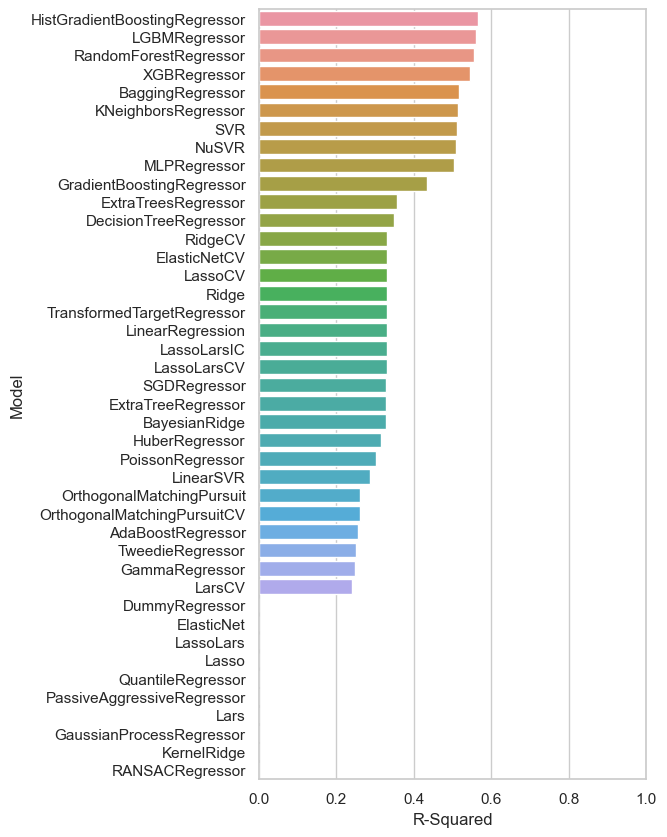

In [63]:
# Bar plot of R-squared values

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

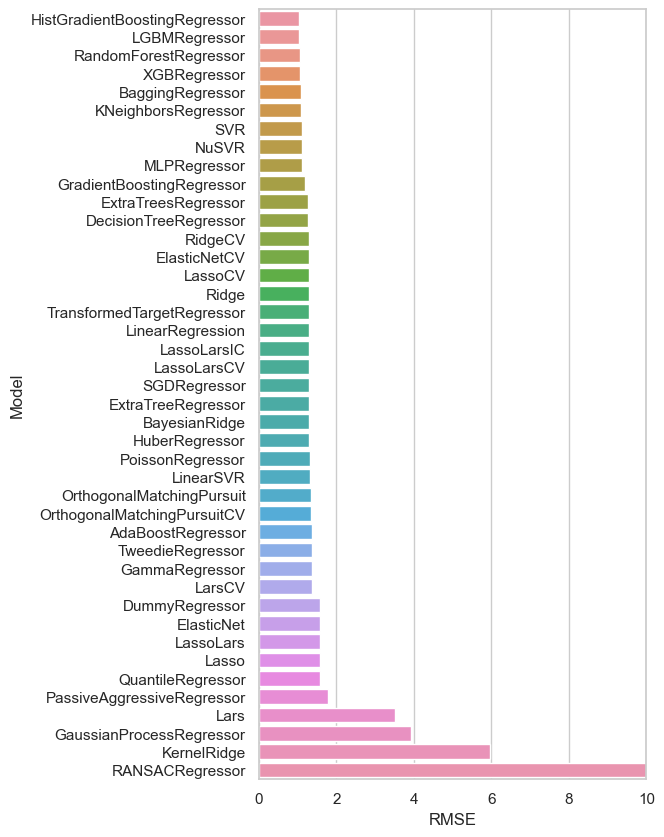

In [64]:
# Bar plot of RMSE values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

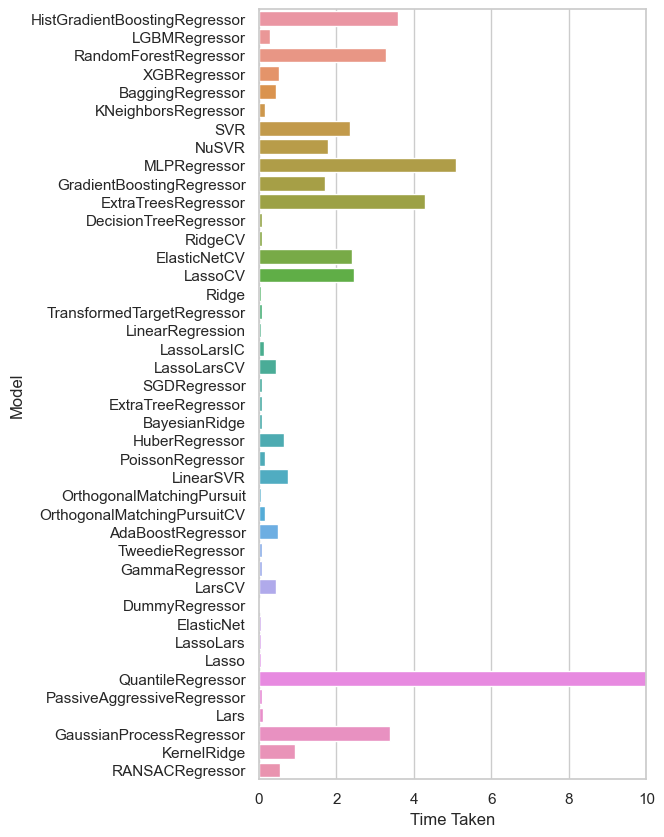

In [65]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))